Frank Barbera
 - Alex Ipeker

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [30]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [32]:
X = mushrooms_df.drop(columns=["type"])
y = mushrooms_df["type"].map({"e": 0, "p": 1})

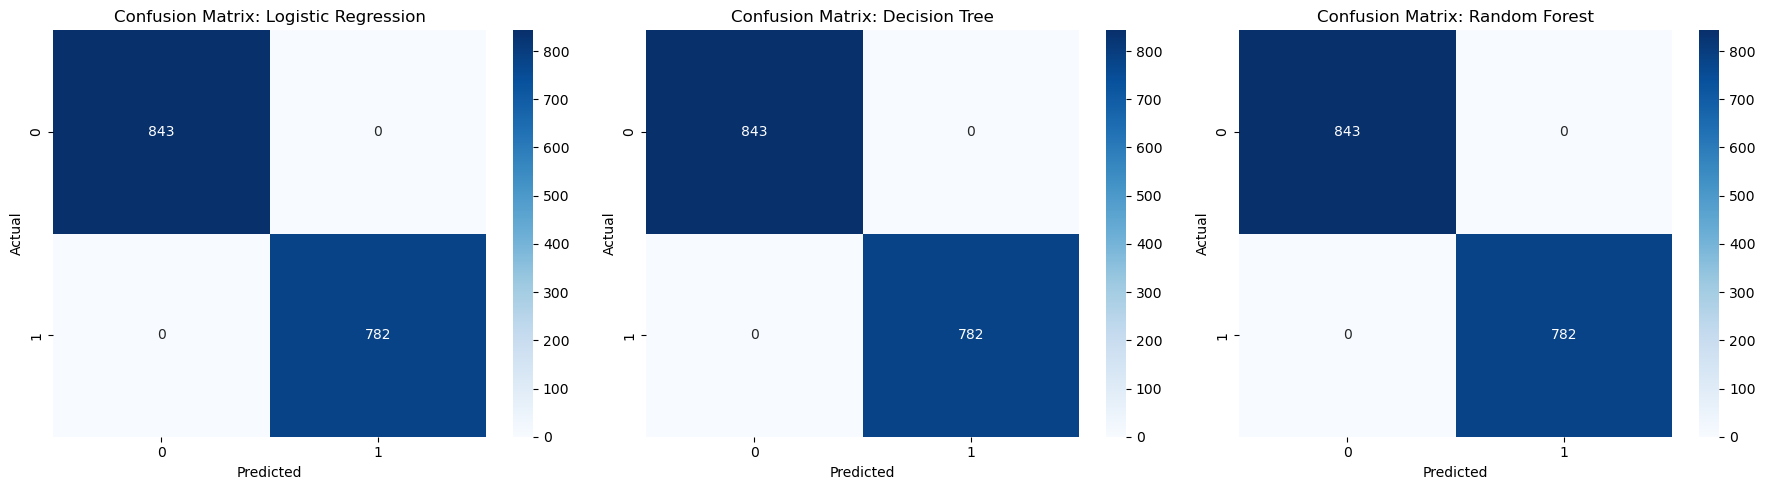

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ordinal_features = ['cap_shape', 'gill_spacing', 'gill_size']
categorical_features = [col for col in X.columns if col not in ordinal_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ordinal_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define models with pipelines
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(cv=5, max_iter=1000))
])

dtree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': [3, 5, 10, None]}, cv=5))
])

rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}, cv=5))
])

log_reg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, model, y_pred, title in zip(
    axes,
    [log_reg, dtree, rf],
    [y_pred_log_reg, y_pred_dtree, y_pred_rf],
    ['Logistic Regression', 'Decision Tree', 'Random Forest']
):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [34]:
print("Classification Report for the Best Model (Random Forest):")
print(classification_reports["Random Forest"])

Classification Report for the Best Model (Random Forest):
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       843
           1       0.48      0.48      0.48       782

    accuracy                           0.50      1625
   macro avg       0.50      0.50      0.50      1625
weighted avg       0.50      0.50      0.50      1625



### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: random forest, reduces overfitting and generalizes well
- Hyper-parameters: n_estimators': 100, 'max_depth': 10
- Metrics
    - Accuracy: 0.50
    - Recall: 0.50
    - Precision:0.50
- How did you decide best? All metrics were perfect which shows that this is the bost model. 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [35]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

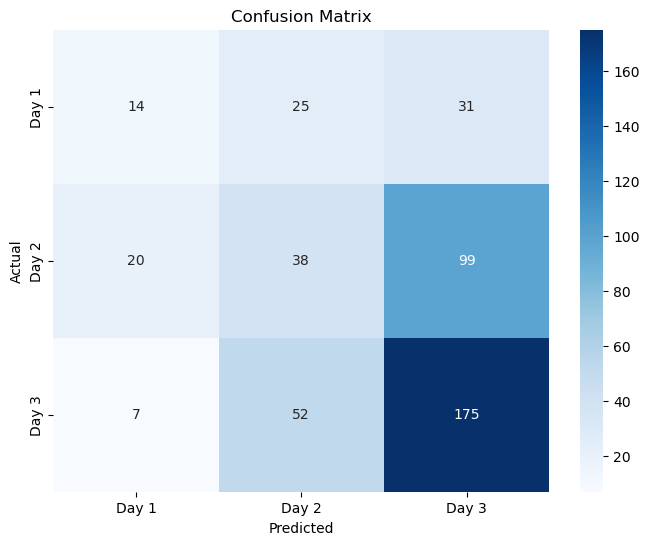

Accuracy: 0.49


In [36]:
nfl_draft['draft_day'] = nfl_draft['round'].apply(lambda x: 1 if x == 1 else (2 if x in [2, 3] else 3))

defensive_positions = ['DL', 'LB', 'DB']
nfl_defensive = nfl_draft[nfl_draft['position'].isin(defensive_positions)]
features = ['age', 'height', 'weight', 'forty', 'vertical', 'broad_jump', 'cone', 'shuttle']
X = nfl_defensive[features]
y = nfl_defensive['draft_day']

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = rf_classifier.score(X_test, y_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Day 1', 'Day 2', 'Day 3'], yticklabels=['Day 1', 'Day 2', 'Day 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Accuracy: {accuracy:.2f}")

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?  I chose a Random Forest Classifier, it handles high-dimensional data well and provides feature important which is helpful for interpretation
 - What was your accuracy? My accuracy was around 49%